In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv', index_col = 0)

In [ ]:
df.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
del df['Genre']
del df['Age']

In [ ]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [ ]:
from sklearn.cluster import KMeans

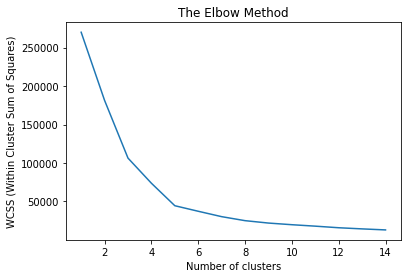

In [ ]:
wcss = []
kmeans = range(1,15)
for kmean in kmeans:
    kmean_c = KMeans(n_clusters = kmean, init = 'k-means++', )
    kmean_c.fit(X)
    wcss.append(kmean_c.inertia_)
plt.plot(kmeans, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

The elbow is at 5 so the number of clusters will be five.

In [ ]:
df.sample(frac=1)

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
130,71,75
184,98,88
26,28,82
92,59,41
61,46,56
...,...,...
181,97,32
125,70,29
8,18,94


In [ ]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state= 20)
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [ ]:
lab = k_means.labels_

In [ ]:
label = k_means.fit_predict(df)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [ ]:
import sklearn.cluster as cluster

In [ ]:
cluster_centers = k_means.cluster_centers_
cluster_centers

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

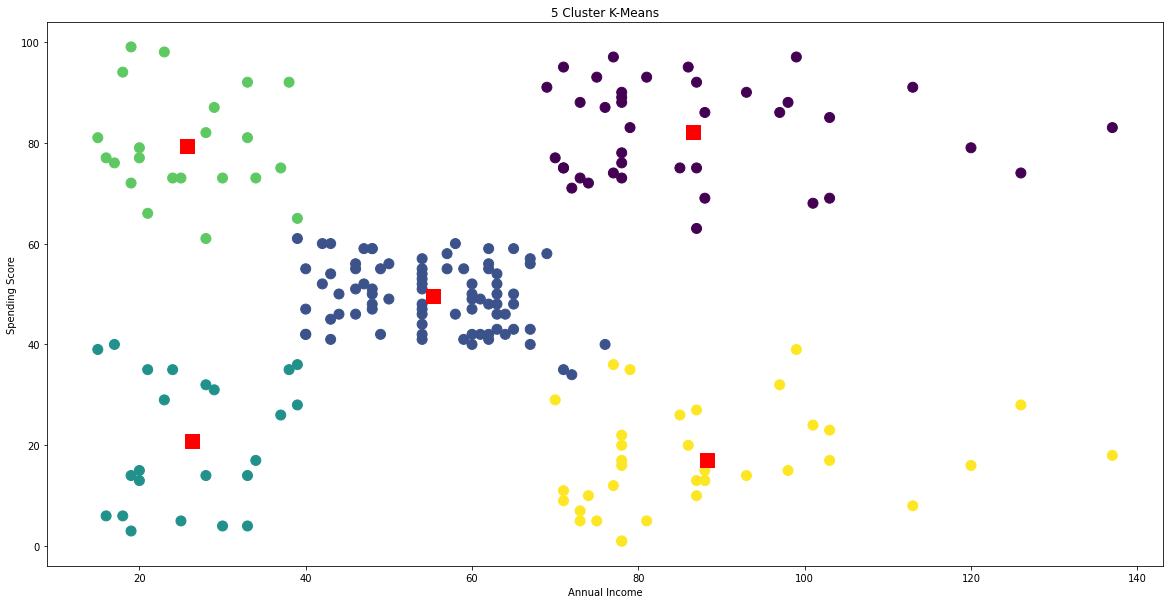

In [ ]:
plt.figure(figsize=(20, 10))

plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c = lab, s=100)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN 

from sklearn.preprocessing import StandardScaler

No handles with labels found to put in legend.


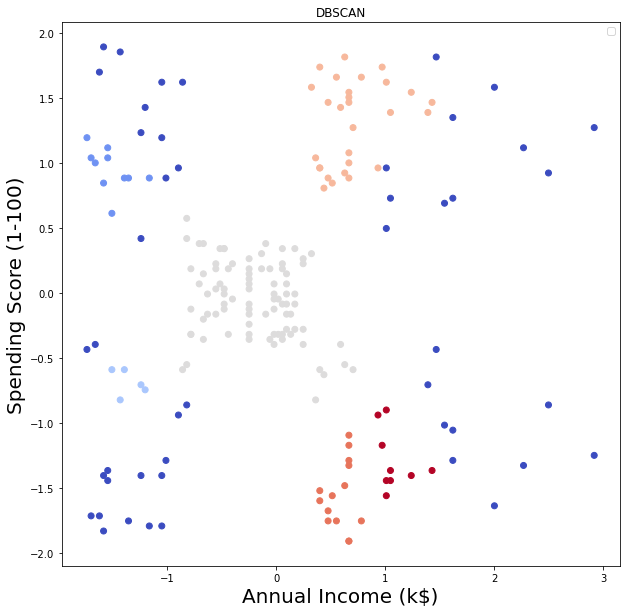

In [ ]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.figure(figsize=(10,10))
    plt.title('Clusters',fontsize=20)
    plt.xlabel('Annual Income (k$)',fontsize=20)
    plt.ylabel('Spending Score (1-100)',fontsize=20)
    plt.legend()
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='coolwarm')
    plt.title("DBSCAN")
dbscan(X,eps=0.275,min_samples=5)